# Up and running with PANDA and netZooPy

Author : Daniel Morgan

Regulatory network reconstruction is a fundamental problem in computational biology. There are significant limitations to such reconstruction using individual datasets, and increasingly people attempt to construct networks using multiple, independent datasets obtained from complementary sources, but methods for this integration are lacking. We developed PANDA (Passing Attributes between Networks for Data Assimilation), a message-passing model using multiple sources of information to predict regulatory relationships, and used it to integrate protein-protein interaction, gene expression, and sequence motif data to reconstruct genome-wide, condition-specific regulatory networks in yeast as a model. The resulting networks were not only more accurate than those produced using individual data sets and other existing methods, but they also captured information regarding specific biological mechanisms and pathways that were missed using other methodologies. PANDA is scalable to higher eukaryotes, applicable to specific tissue or cell type data and conceptually generalizable to include a variety of regulatory, interaction, expression, and other genome-scale data.

Glass K, Huttenhower C, Quackenbush J, Yuan GC. Passing Messages Between Biological Networks to Refine Predicted Interactions, PLoS One, 2013 May 31;8(5):e64832

In [5]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0064832.g001", width=500, height=500)

# Installation and Setup

In [ ]:
%%bash
cd ~
git clone https://github.com/netZoo/netZooPy.git
cd netZooPy
pip3 install -e .

In [14]:
from netZooPy.panda.panda import Panda
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'/Users/redmo'

# Parameter Setting & Exploring the Data

First, we start by setting the path to the 1) motif prior network, 2) the gene expression data, and 3) the ppi network data.
The motif prior network is typically a TF-by-gene binary matrix where 1 indicates the presence of sequence (motif) of a TF in the gene regulatory region and 0 otherwise.
Gene expression data is typically a gene-by-sample matrix containing expression data.
PPI network is a TF-by-TF binary matrix, where 1 indicates a physical interaction between two TFs and 0 otherwise.
If two TFs are likely to binding, they are likely to form regulatory complexes for the same genes.

*n.b. Note that unlike implementations in other languages, this python implementation normalizes each input to avoid biases from platform

In [28]:
expression_data='netZooPy/tests/ToyData/ToyExpressionData.txt'
motif_data='netZooPy/tests/ToyData/ToyMotifData.txt'
ppi_data='netZooPy/tests/ToyData/ToyPPIData.txt'
panda_output='netZooPy/tests/panda/output_panda.txt'

In [16]:
pd.read_csv(expression_data,sep="\t", header=None).shape

(1000, 51)

There are 1000 genes and 51 samples in our toy data. This is your novel input. The remaining files are known interaction lists.

In [17]:
motif_data=pd.read_csv(motif_data,sep="\t",header=None)
motif_data[0].unique().size

87

In [18]:
motif_data[1].unique().size

913

Since the first column is TF, you thus have 87 TF and 913 genes are returned from the second column, with their interaction weights in the third column (motif_data[2]). Now lets check out the ppi data, another interaction list with three columns, with 238 interactions between the TF.

In [19]:
ppi_data=pd.read_csv(ppi_data,sep="\t",header=None)
ppi_data.shape

(238, 3)

# Calling PANDA

One can chose to run in terminal simply by pointing to the input files

In [ ]:
%%bash
cd netZooPy
pip3 install -e .
python netZooPy/panda/run_panda.py -e netZooPy/tests/ToyData/ToyExpressionData.txt -m netZooPy/tests/ToyData/ToyMotifData.txt -p netZooPy/tests/ToyData/ToyPPIData.txt -f True -o test_panda.txt

Alternatively one can continue running in Jupyter.

In [41]:
expression_data='netZooPy/tests/ToyData/ToyExpressionData.txt'
motif_data='netZooPy/tests/ToyData/ToyMotifData.txt'
ppi_data='netZooPy/tests/ToyData/ToyPPIData.txt'
panda_obj = Panda(expression_data, motif_data, ppi_data, save_tmp=True,save_memory = False, remove_missing=False, keep_expression_matrix = False)
panda_obj.save_panda_results(panda_output)

Loading motif data ...
Unique TFs: 87
  Elapsed time: 0.02 sec.
Loading expression data ...
Expression matrix: (1000, 50)
  Elapsed time: 0.01 sec.
Loading PPI data ...
Number of PPIs: 238
  Elapsed time: 0.00 sec.
Calculating coexpression network ...
  Elapsed time: 0.01 sec.
Creating motif network ...
  Elapsed time: 0.01 sec.
Creating PPI network ...
  Elapsed time: 0.00 sec.
Normalizing networks ...
  Elapsed time: 0.03 sec.
Saving expression matrix and normalized networks ...
  Elapsed time: 0.00 sec.
Running PANDA algorithm ...
step: 0, hamming: 0.7189662815459754
step: 1, hamming: 0.3899291546314954
step: 2, hamming: 0.40236683889692043
step: 3, hamming: 0.4005209618112847
step: 4, hamming: 0.38904060163854676


/Users/redmo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd


step: 5, hamming: 0.37050927774796627
step: 6, hamming: 0.346813714233211
step: 7, hamming: 0.3197200219092709
step: 8, hamming: 0.2908059296381211
step: 9, hamming: 0.2614076747991081
step: 10, hamming: 0.2325667493310834
step: 11, hamming: 0.2050473463652485
step: 12, hamming: 0.17936756642941445
step: 13, hamming: 0.15582820203948794
step: 14, hamming: 0.13456406927299874
step: 15, hamming: 0.11558769817777673
step: 16, hamming: 0.09882404071423921
step: 17, hamming: 0.08414234823461533
step: 18, hamming: 0.07137863350560042
step: 19, hamming: 0.060352597421148776
step: 20, hamming: 0.05087989460076123
step: 21, hamming: 0.04278075541305479
step: 22, hamming: 0.03588517917018383
step: 23, hamming: 0.030036230563844166
step: 24, hamming: 0.025091497107547298
step: 25, hamming: 0.020923570455323975
step: 26, hamming: 0.017419753654909373
step: 27, hamming: 0.014481280791973365
step: 28, hamming: 0.012022271977958703
step: 29, hamming: 0.009968530625360777
step: 30, hamming: 0.00825631

Or on another toy dataset

In [ ]:
expression_data='netZooPy/tests/ToyData/expressionTest.txt'
motif_data='netZooPy/tests/ToyData/motifTest.txt'
ppi_data='netZooPy/tests/ToyData/ppiTest.txt'

panda_obj = Panda(expression_data, motif_data, ppi_data)
panda_obj.save_panda_results(panda_output)

Basic follow up analysis is also possible, such as degree calculation per gene

In [31]:
panda_obj.return_panda_indegree()

,force
gene,
ENSG00000000003,-59.850068
ENSG00000000005,-57.343887
ENSG00000000419,-93.568952
ENSG00000000457,-13.318462
ENSG00000000460,-104.877478
...,...
ENSG00000067066,234.652903
ENSG00000067082,-55.275136
ENSG00000067113,29.712915


In [38]:
panda_obj.panda_results

,tf,gene,motif,force
0,AHR,ENSG00000000003,0.0,-0.8172097193685302
1,AIRE,ENSG00000000003,0.0,-0.22175696013345828
2,ALX1,ENSG00000000003,0.0,0.06146987396574343
3,ALX3,ENSG00000000003,0.0,0.10342863303104977
4,ALX4,ENSG00000000003,0.0,0.04836376022878871
...,...,...,...,...
660995,ZNF784,ENSG00000067167,0.0,-0.3497773353282285
660996,ZSCAN10,ENSG00000067167,0.0,-0.55172380731339
660997,ZSCAN16,ENSG00000067167,0.0,-0.2982149560354192
660998,ZSCAN26,ENSG00000067167,0.0,-0.24178447785501178


There is even basic plotting functionality

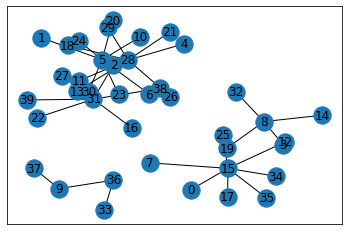

In [43]:
panda_obj.top_network_plot(top=35)